### Standard Import and Reading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

### 1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [2]:
df.head()
df.shape
df.dtypes
df.info()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


(16057, 12)

hour_beginning        object
location              object
Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
lat                  float64
long                 float64
events                object
Location1             object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [3]:
df["hour_beginning"] = pd.to_datetime(df["hour_beginning"])
df.info()
df.hour_beginning.head(5)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


0   2019-04-30 00:00:00
1   2019-12-31 22:00:00
2   2019-12-31 23:00:00
3   2019-12-31 21:00:00
4   2019-04-01 03:00:00
Name: hour_beginning, dtype: datetime64[ns]

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
dtype: int64

In [4]:
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
min_dt
max_dt

expected_range = pd.date_range(start=min_dt, end=max_dt, freq='H')
expected_range

missing_hours = expected_range.difference(df['hour_beginning'])
missing_hours

Timestamp('2017-10-01 00:00:00')

Timestamp('2019-12-31 23:00:00')

DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 01:00:00',
               '2017-10-01 02:00:00', '2017-10-01 03:00:00',
               '2017-10-01 04:00:00', '2017-10-01 05:00:00',
               '2017-10-01 06:00:00', '2017-10-01 07:00:00',
               '2017-10-01 08:00:00', '2017-10-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=19728, freq='h')

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=3672, freq='h')

In [5]:
df = df.sort_values(by='hour_beginning')
df.reset_index(drop=True, inplace=True)

df["weather_summary"] = df["weather_summary"].fillna(method="ffill")
df["temperature"] = df["temperature"].fillna(method="ffill")
df["precipitation"] = df["precipitation"].fillna(method="ffill")

df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
dtype: int64

In [6]:
df["day_of_week"] = df["hour_beginning"].dt.day_name()
df.head()
df.day_of_week.value_counts()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday


day_of_week
Tuesday      2328
Sunday       2305
Monday       2304
Wednesday    2280
Thursday     2280
Friday       2280
Saturday     2280
Name: count, dtype: int64

In [7]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

weekday_df = df[df['day_of_week'].isin(weekdays)]
weekday_df.head()

weekday_df.shape

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week
24,2017-10-02 00:00:00,Brooklyn Bridge,60,20,40,clear-night,53.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
25,2017-10-02 01:00:00,Brooklyn Bridge,27,15,12,clear-night,52.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
26,2017-10-02 02:00:00,Brooklyn Bridge,6,3,3,clear-night,51.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
27,2017-10-02 03:00:00,Brooklyn Bridge,8,5,3,clear-night,50.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
28,2017-10-02 04:00:00,Brooklyn Bridge,2,0,2,clear-night,49.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday


(11472, 13)

In [8]:
weekday_df['day_of_week'] = pd.Categorical(weekday_df['day_of_week'], categories=weekdays, ordered=True)
weekday_df = weekday_df.sort_values(by="day_of_week")
weekday_df.reset_index(drop=True, inplace=True)

In [9]:
weekday_df.head()
weekday_df.shape
weekday_df['day_of_week'].value_counts()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week
0,2017-10-02 00:00:00,Brooklyn Bridge,60,20,40,clear-night,53.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
1,2019-04-22 04:00:00,Brooklyn Bridge,0,0,0,clear-night,53.0,0.0,40.708164,-73.999509,Easter Monday,"(40.7081639691088, -73.9995087014816)",Monday
2,2019-04-22 03:00:00,Brooklyn Bridge,0,0,0,clear-night,53.0,0.0,40.708164,-73.999509,Easter Monday,"(40.7081639691088, -73.9995087014816)",Monday
3,2019-04-22 02:00:00,Brooklyn Bridge,0,0,0,clear-night,54.0,0.0,40.708164,-73.999509,Easter Monday,"(40.7081639691088, -73.9995087014816)",Monday
4,2019-04-22 01:00:00,Brooklyn Bridge,1,0,1,clear-night,54.0,0.0,40.708164,-73.999509,Easter Monday,"(40.7081639691088, -73.9995087014816)",Monday


(11472, 13)

day_of_week
Tuesday      2328
Monday       2304
Wednesday    2280
Thursday     2280
Friday       2280
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Pedestrians Counts over Weekdays')

Text(0.5, 0, 'Day of the Week (Weekdays Only)')

Text(0, 0.5, 'Number of Pedestrians')

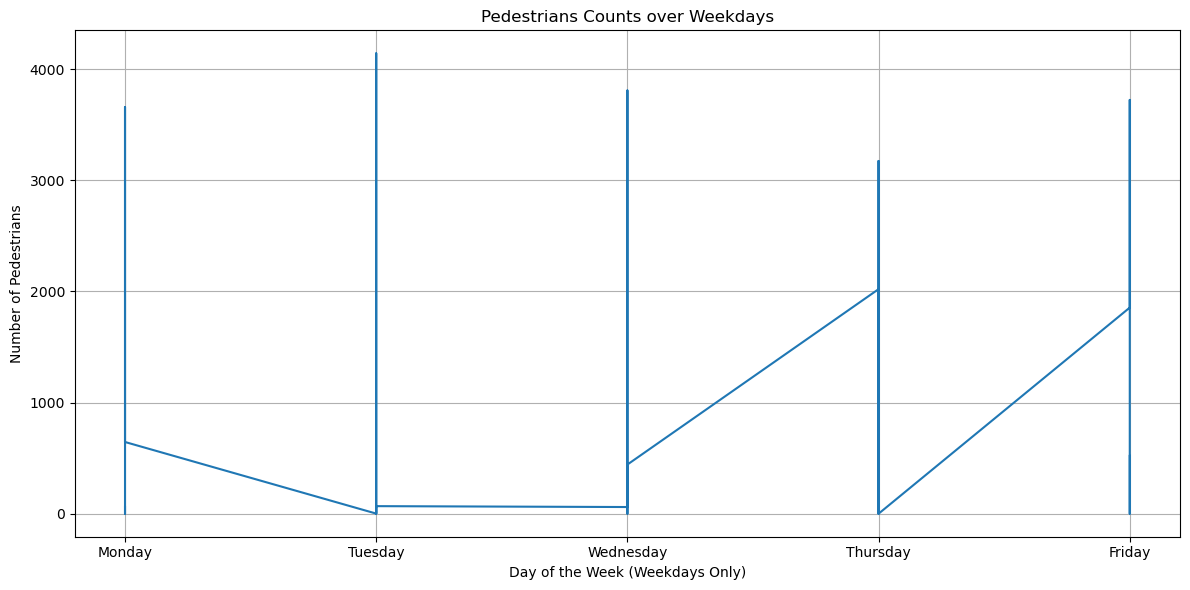

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(weekday_df["day_of_week"], weekday_df["Pedestrians"])
plt.title("Pedestrians Counts over Weekdays")
plt.xlabel("Day of the Week (Weekdays Only)")
plt.ylabel("Number of Pedestrians")
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations (with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature (Pedestrians) and a non-numerical feature (Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers (0,1,2...). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical datapoints, nonetheless this was given as a question to help you understand the concept better.

In [11]:
df["year"] = df["hour_beginning"].dt.year
df.head()

df['year'].value_counts()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week,year
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017


year
2019    8761
2018    5088
2017    2208
Name: count, dtype: int64

In [12]:
df_2019 = df[df['year']==2019]
df_2019.head()
df_2019.shape

df_2019["weather_summary"].value_counts()
df_2019.groupby("weather_summary")['Pedestrians'].describe()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week,year
7296,2019-01-01 00:00:00,Brooklyn Bridge,144,24,120,rain,46.0,0.1363,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
7297,2019-01-01 01:00:00,Brooklyn Bridge,39,20,19,rain,47.0,0.0490,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
7298,2019-01-01 02:00:00,Brooklyn Bridge,15,10,5,rain,47.0,0.0279,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
7299,2019-01-01 03:00:00,Brooklyn Bridge,14,10,4,cloudy,48.0,0.0044,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
7300,2019-01-01 04:00:00,Brooklyn Bridge,8,6,2,cloudy,50.0,0.0003,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday,2019


(8761, 14)

weather_summary
clear-night            1865
cloudy                 1818
partly-cloudy-day      1773
clear-day              1413
partly-cloudy-night    1213
rain                    607
snow                     38
fog                      22
sleet                     8
wind                      4
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,1413.0,1382.183298,876.267199,0.0,568.00,1380.0,2028.00,4108.0
clear-night,1865.0,33.150134,78.847485,0.0,0.00,4.0,36.00,1034.0
cloudy,1818.0,541.737624,737.719776,0.0,5.00,120.5,953.00,3894.0
fog,22.0,212.409091,330.504039,0.0,8.75,80.0,222.00,1262.0
partly-cloudy-day,1773.0,1574.093627,866.684380,0.0,870.00,1632.0,2159.00,4286.0
partly-cloudy-night,1213.0,52.596867,119.868003,0.0,1.00,10.0,51.00,1391.0
rain,607.0,229.822076,373.117494,0.0,6.00,52.0,264.50,2703.0
sleet,8.0,178.250000,188.028683,0.0,5.50,155.5,350.25,404.0
snow,38.0,222.631579,344.718328,0.0,5.25,29.5,343.75,1561.0


In [13]:
encoder = OneHotEncoder(sparse=False)
weather_encoded = encoder.fit_transform(df_2019[['weather_summary']])

encoded_feature_names = encoder.get_feature_names_out(['weather_summary'])
weather_encoded = pd.DataFrame(weather_encoded, columns=encoded_feature_names, index=df_2019.index)


weather_encoded

,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
7296,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7297,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7298,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7299,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16052,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16054,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16055,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_2019 = pd.concat([df_2019, weather_encoded], axis=1)
# df_2019.drop('weather_summary', axis=1, inplace=True)

df_2019.head()
df_2019.shape

df_2019.columns

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,...,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
7296,2019-01-01 00:00:00,Brooklyn Bridge,144,24,120,rain,46.0,0.1363,40.708164,-73.999509,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7297,2019-01-01 01:00:00,Brooklyn Bridge,39,20,19,rain,47.0,0.0490,40.708164,-73.999509,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7298,2019-01-01 02:00:00,Brooklyn Bridge,15,10,5,rain,47.0,0.0279,40.708164,-73.999509,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7299,2019-01-01 03:00:00,Brooklyn Bridge,14,10,4,cloudy,48.0,0.0044,40.708164,-73.999509,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7300,2019-01-01 04:00:00,Brooklyn Bridge,8,6,2,cloudy,50.0,0.0003,40.708164,-73.999509,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(8761, 24)

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1', 'day_of_week', 'year',
       'weather_summary_clear-day', 'weather_summary_clear-night',
       'weather_summary_cloudy', 'weather_summary_fog',
       'weather_summary_partly-cloudy-day',
       'weather_summary_partly-cloudy-night', 'weather_summary_rain',
       'weather_summary_sleet', 'weather_summary_snow',
       'weather_summary_wind'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix between Weather and Pedestrian Counts')

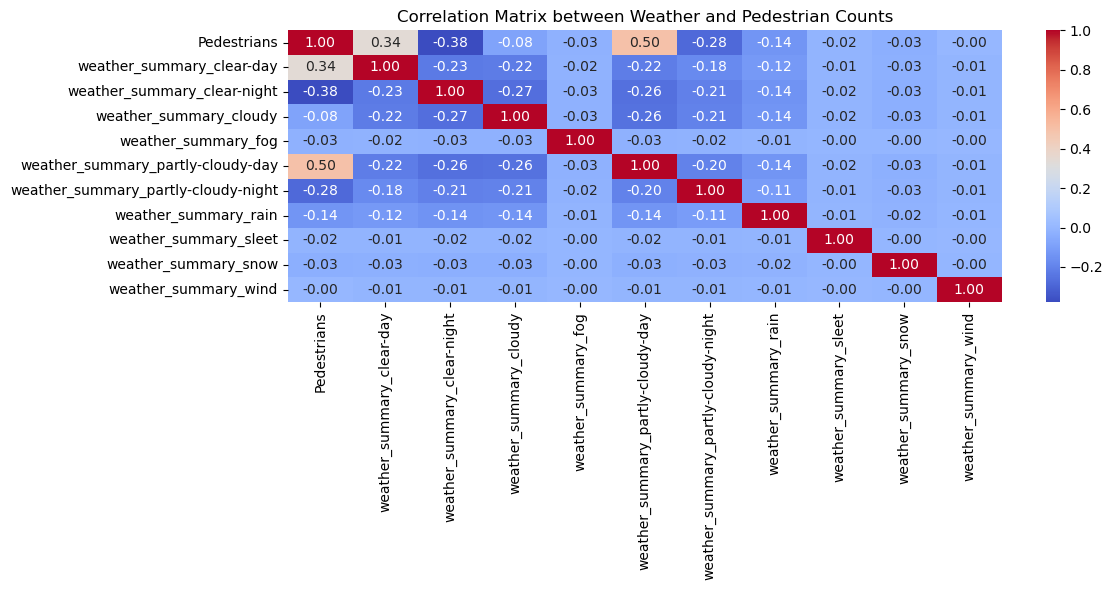

In [15]:
correlation_matrix = df_2019[['Pedestrians', 'weather_summary_clear-day', 
                              'weather_summary_clear-night', 'weather_summary_cloudy', 
                              'weather_summary_fog', 'weather_summary_partly-cloudy-day',
                              'weather_summary_partly-cloudy-night', 'weather_summary_rain',
                              'weather_summary_sleet', 'weather_summary_snow',
                              'weather_summary_wind']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix between Weather and Pedestrian Counts")
plt.tight_layout()
plt.show()

### 3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

In [16]:
def time_range(timestamp):
    hr = timestamp.hour
    if (hr>=5) and (hr<12):
        return "morning"
    elif (hr>=12) and (hr<17):
        return "afternoon"
    elif (hr>=17) and (hr<21):
        return "evening"
    else:
        return "night"

In [17]:
df['time_of_day'] = df['hour_beginning'].apply(time_range)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week,year,time_of_day
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017,night
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017,night
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017,night
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017,night
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2017,night


In [18]:
df.groupby('time_of_day')["Pedestrians"].describe()

,count,mean,std,min,25%,50%,75%,max
time_of_day,,,,,,,,
afternoon,3345.0,1749.484305,787.870792,0.0,1200.00,1756.0,2234.0,4286.0
evening,2676.0,908.873318,828.406997,0.0,139.75,663.0,1554.5,3639.0
morning,4683.0,529.699338,610.266529,0.0,84.00,278.0,781.0,4330.0
night,5353.0,50.086680,127.290324,0.0,1.00,7.0,38.0,1522.0


<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='time_of_day', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Pedestrian Counts by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Pedestrian Count')

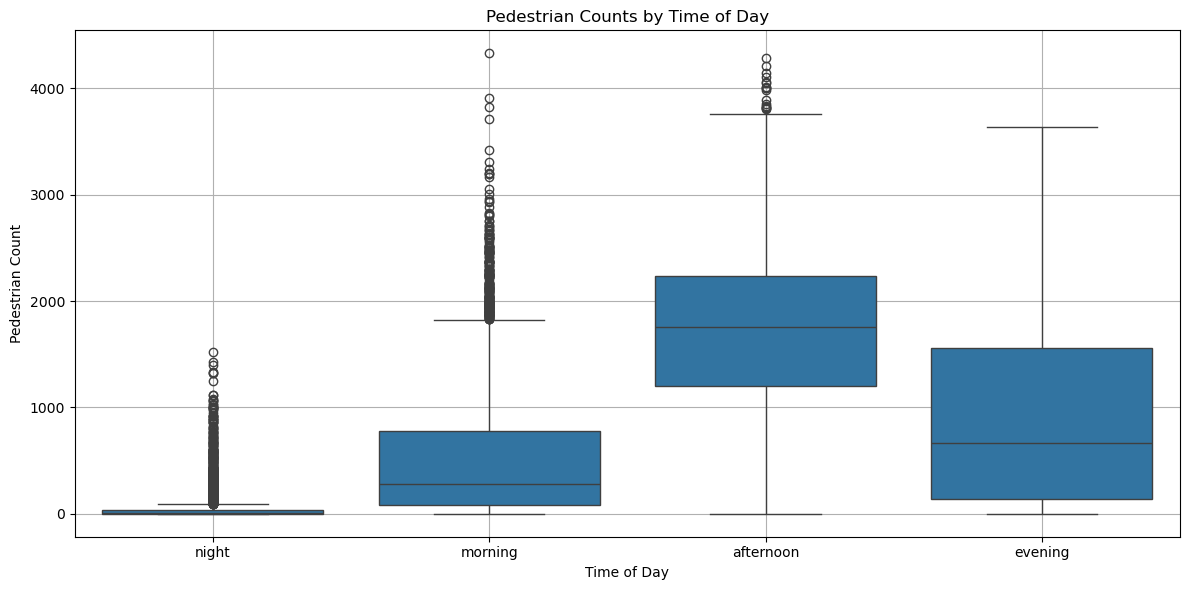

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='time_of_day', y='Pedestrians')
plt.title("Pedestrian Counts by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Pedestrian Count")

plt.grid(True)
plt.tight_layout()
plt.show()